In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


# Stats

In [2]:
stats = get_all_stats()

  0%|          | 0/26 [00:00<?, ?it/s]

# Static features

In [3]:
def logistic_regression_I(network_index: int):
  X = dict()
  for heuristic in ['aa', 'cn', 'jc', 'pa']:
    X[heuristic] = np.load(
      f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy')
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000)) # type: ignore
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1]) # type: ignore
  
  return auc

auc_I = {
  network_index: logistic_regression_I(network_index) 
  for network_index in network_indices}
auc_I

{1: 0.6943646956213696,
 2: 0.814371163565029,
 3: 0.8505774106994708,
 4: 0.7595517011076042,
 5: 0.6848675761797249,
 6: 0.7575504191952863,
 7: 0.7218393889648314,
 8: 0.763940739114067,
 9: 0.8427168670640854,
 10: 0.8912314732390386,
 11: 0.9327225243145959,
 12: 0.8562968321198902,
 13: 0.7260811846919581,
 14: 0.8726773028620881,
 16: 0.8861937918881752,
 18: 0.8601321834363183,
 19: 0.924298522510412,
 20: 0.8240534248547976,
 21: 0.6791120269644051,
 22: 0.9337325316708394,
 23: 0.9177313891187734,
 24: 0.7828615123238073,
 25: 0.8674034643954918,
 28: 0.8776051267281106,
 29: 0.9137990291257476,
 30: 0.8264720506161171}

# Node temporal and static features

In [4]:
def logistic_regression_I_II(network_index: int, hypergraph: bool):
  X = dict()
  for heuristic in ['aa', 'cn', 'jc', 'pa']:
    X[heuristic] = (
      np.load(
        f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy'))
    
  if hypergraph:
    for time_strategy in time_strategies:
      for nodepair_strategy in nodepair_strategies:
        for aggregation_strategy in ['m0', 'm1', 'm2', 'm3', 'q0', 'q25', 'q50', 'q75', 'q100']:
          X[(time_strategy, nodepair_strategy, aggregation_strategy)] = (
            np.load(
              f'data/{network_index:02}/features/time_node/'
              f'{time_strategy}_{nodepair_strategy}_{aggregation_strategy}.npy'
            ))
  else:
    for time_strategy in time_strategies:
      for nodepair_strategy in nodepair_strategies:
          X[(time_strategy, nodepair_strategy)] = (
            np.load(
              f'data/{network_index:02}/features/time_node/'
              f'{time_strategy}_{nodepair_strategy}.npy'))
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_I_II = {
  network_index: (
    logistic_regression_I_II(
      network_index, hypergraph=network_index in hypergraph_indices
    )
  )
  for network_index in network_indices
}
auc_I_II

{1: 0.797024969443604,
 2: 0.8611126044482673,
 3: 0.9025604121748383,
 4: 0.7818790899320651,
 5: 0.7295156836303893,
 6: 0.8270100805780308,
 7: 0.8251423246007413,
 8: 0.7890008367686615,
 9: 0.8674021638966845,
 10: 0.9200984844763588,
 11: 0.9313523547390824,
 12: 0.9004777440764391,
 13: 0.8756213372624422,
 14: 0.9319682487207037,
 16: 0.9419515161813531,
 18: 0.9326531592087575,
 19: 0.9365869947410896,
 20: 0.9443199091185459,
 21: 0.7232918218838085,
 22: 0.9702011830949048,
 23: 0.9640886630447099,
 24: 0.9489048805757009,
 25: 0.9362226934461071,
 28: 0.8957685587136702,
 29: 0.9264780813859331,
 30: 0.8404139959227188}

# Edge temporal features

In [5]:
def logistic_regression_III(
    network_index: int, hypergraph: bool):
  aggregation_strategies = ['m0', 'm1', 'q0', 'q25', 'q50', 'q75', 'q100']
  X = dict()
  
  for heuristic in ['aa', 'cn', 'jc', 'pa']:  
    for time_strategy in time_strategies:
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
            X[(heuristic, time_strategy, aggregation_strategy)] = np.load(
                f'data/{network_index:02}/features/time_edge/'
                f'{heuristic}_{time_strategy}_{aggregation_strategy}.npy')
      else:
        X[(heuristic, time_strategy)] = np.load(
          f'data/{network_index:02}/features/time_edge/'
          f'{heuristic}_{time_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_III = {
  network_index: logistic_regression_III(
    network_index, hypergraph=network_index in hypergraph_indices)
  for network_index in network_indices}
auc_III

{1: 0.8179688829594346,
 2: 0.8411743308254239,
 3: 0.8835700131809736,
 4: 0.7900205747983281,
 5: 0.7504979470037488,
 6: 0.8084422785908887,
 7: 0.8423927097415099,
 8: 0.802563925314162,
 9: 0.8393173061920136,
 10: 0.9222488511059931,
 11: 0.9388950008928006,
 12: 0.8906935827895325,
 13: 0.7989561347692283,
 14: 0.9221595545528729,
 16: 0.9280338891481368,
 18: 0.9279218764079165,
 19: 0.9251901190119012,
 20: 0.9341720222814056,
 21: 0.7300710997974137,
 22: 0.9605346944389338,
 23: 0.9494502380240284,
 24: 0.8791991549836757,
 25: 0.9047031659651386,
 28: 0.8952045536148014,
 29: 0.9145807703132394,
 30: 0.8535604023886202}

# Figure

In [6]:
stats.columns

Index(['edges', 'density (nx.MultiGraph)', 'fraction edges in GC', 'nodes',
       'avg events per pair', 'density', 'degree assortativity',
       'average clustering coefficient', 'fraction nodes in GC',
       'avg events per pair in GC'],
      dtype='object')

In [7]:
df = pd.DataFrame({
  'degree assortativity': stats['degree assortativity'],
  'I': pd.Series(auc_I),
  'I+II': pd.Series(auc_I_II),
  'III': pd.Series(auc_III)
})
df.reset_index(inplace=True)
df = df.melt(
  id_vars=['index', 'degree assortativity'], 
  var_name='experiment', 
  value_name='auc')
df

,index,degree assortativity,experiment,auc
0,1,0.114186,I,0.694365
1,2,0.059906,I,0.814371
2,3,-0.166689,I,0.850577
3,4,0.221522,I,0.759552
4,5,0.177355,I,0.684868
...,...,...,...,...
73,24,-0.078326,III,0.879199
74,25,-0.064984,III,0.904703
75,28,-0.087156,III,0.895205
76,29,-0.137222,III,0.914581


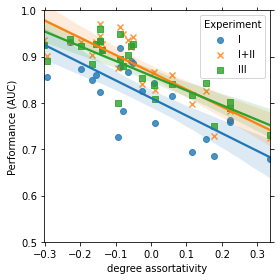

In [9]:
markers = ['o', 'x', 's']
with plt.rc_context(rc):
  for (experiment, df_experiment), marker in zip(df.groupby('experiment'), markers):
    sns.regplot(
      data=df_experiment, x='degree assortativity', y='auc', label=experiment,
      marker=marker)
  plt.legend(title='Experiment')
  plt.ylim(.5, 1)
  plt.ylabel('Performance (AUC)')
  plt.tight_layout()
  plt.savefig('code/figures/output/degree-assortativity.pdf')

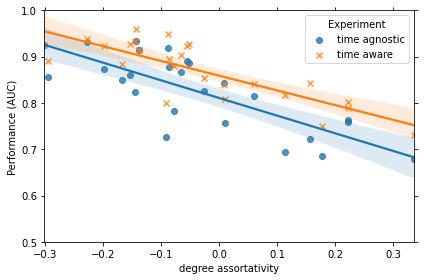

In [15]:
markers = ['o', 'x', 's']
with plt.rc_context({'xtick.top': True, 'ytick.right': True}):
  for (experiment, df_experiment), marker in zip(df.groupby('experiment'), markers):
    sns.regplot(
      data=df_experiment, x='degree assortativity', y='auc', label=experiment,
      marker=marker)
  plt.legend(title='Experiment')
  plt.ylim(.5, 1)
  plt.ylabel('Performance (AUC)')
  plt.tight_layout()
  plt.savefig('code/figures/output/degree-assortativity.pdf')

In [26]:
from scipy.stats.stats import pearsonr

In [34]:
t = df[df['experiment'] == 'time agnostic']
pearsonr(t['degree assortativity'], t['auc'])

(-0.7761846567555292, 3.1582029398101653e-06)

In [35]:
t = df[df['experiment'] == 'time aware']
pearsonr(t['degree assortativity'], t['auc'])

(-0.8122197861483662, 4.6958223455283866e-07)